# AFRICA COVID-19 TREND 

This notebook has been created by DataPivotAfrica to help visualise the COVID-19 pandemic in the continent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import os


In [2]:
ROOT = "../data/"
PATH = os.listdir("../data")
PATH = [p for p in PATH if p.endswith('.csv') and  pd.read_csv(ROOT+p,index_col=0).shape[0]>0]

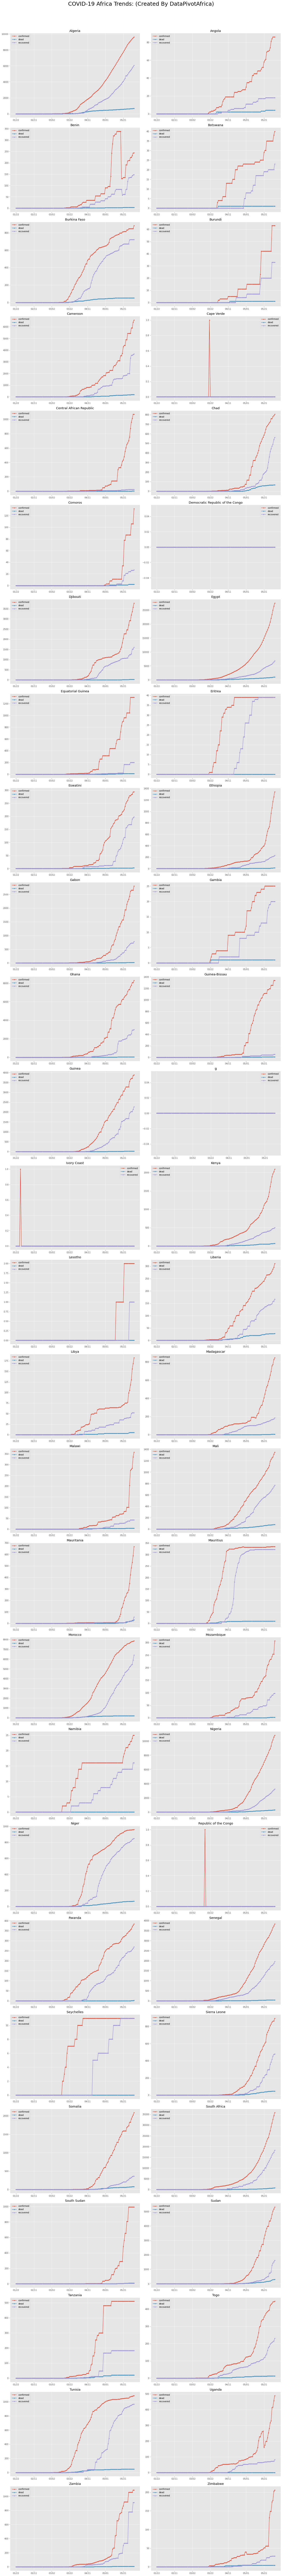

In [3]:
ncols = 2
nrows = int(np.ceil(len(PATH) // ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows*3*2))
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(top=0.7)
for p,ax in zip(PATH, axes.flatten()):
    data = pd.read_csv(ROOT+p, index_col = 0, names = ['confirmed','dead','recovered'],skiprows=1)
    inx = np.array([ "/".join(i.split("-")[:2]) for i in data.index])
    data.set_index(inx,inplace=True)
    data = data.iloc[::-1]
    data.plot(ax = ax, title = p.split(".")[0].split("_")[0], marker='.') 
fig.suptitle("COVID-19 Africa Trends: (Created By DataPivotAfrica)", y = 1.01, size = 25)
fig.tight_layout()
plt.savefig('trend.png', quality = 95,orientation='landscape',dpi = 96)
plt.show()